# STAT 345: Nonparametric Statistics

## Lesson 04.2: The Wilcoxon-Mann-Whitney Rank Sum Statistic

**Reading: Conover Section 5.1**

*Prof. John T. Whelan*

Tuesday 11 February 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

- Sign test and signed-rank test for paired data $\{{\color{royalblue}{X_i}},{\color{royalblue}{Y_i}}|i=1,\ldots,n\}$.  ${\color{royalblue}{X_1}}$ goes w/${\color{royalblue}{Y_1}}$, ${\color{royalblue}{X_2}}$ w/${\color{royalblue}{Y_2}}$, etc.

- Today: independent samples $\{{\color{royalblue}{X_i}}|i=1,\ldots,n\}$ and $\{{\color{royalblue}{Y_j}}|j=1,\ldots,m\}$ from possibly different distributions. ${\color{royalblue}{X_1}}$ has nothing more to do w/${\color{royalblue}{Y_1}}$ than ${\color{royalblue}{Y_4}}$.  Sample sizes $n$ and $m$ can also differ. 

- Call total size of both samples $n+m=N$.

- Test the hypothesis that both samples drawn from same distribution, or more precisely that
$$P({\color{royalblue}{X}}{\mathbin{>}}{\color{royalblue}{Y}})=P({\color{royalblue}{X}}{\mathbin{<}}{\color{royalblue}{Y}})$$
by combining the two samples into one list, ranking that list, and then
using as a test statistic the sum of the ranks of the $\{x_i\}$.

As an example, consider the following samples, with $n=5$, $m=4$, and $N=5+4=9$:

In [3]:
x_i = np.array([8.56, 5.03, 48.1, 1.31, 4.82]); y_j = np.array([15.0, 12.3, 28.0, 13.9])
n = len(x_i); m = len(y_j); N = n + m
print("n=%d, m=%d, N=n+m=%d" % (n,m,N))

n=5, m=4, N=n+m=9


It’s convenient to summarize the data in a table:

| rank | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| ---- | - | - | - | - | - | - | - | - | - |
| Data | 1.31 | 4.82 | 5.03 | 8.56 | 12.3 | 13.9 | 15.0 | 28.0 | 48.1 |
| Set | x | x | x | x | y | y | y | y | x |

The Wilcoxon rank-sum statistic is $w_x = 1+2+3+4+9 = 19$, because the
four lowest values in the combined sample ($1.31$, $4.82$, $5.03$, and
$8.56$), and the highest ($48.1$) come from the $\{x_i\}$.

We can use the `rankdata` function to automatically obtain the ranks in the combined list.

In [4]:
xandy_r = np.concatenate([x_i,y_j]); xandy_r

array([ 8.56,  5.03, 48.1 ,  1.31,  4.82, 15.  , 12.3 , 28.  , 13.9 ])

In [5]:
ranks_r = stats.rankdata(xandy_r); ranks_r

array([4., 3., 9., 1., 2., 7., 5., 8., 6.])

Of course, to add up the $x_i$ ranks, we need a way to pick out which elements in the list came from `x_i` and which came from `y_j`.  We could do it with a boolean list:

In [6]:
xflags_r = [True]*n + [False]*m; xflags_r

[True, True, True, True, True, False, False, False, False]

In [7]:
xranks_i = ranks_r[xflags_r]

Or we could just to take a slice of the first $n$ elements of the combined rank list:

In [8]:
xranks_i, ranks_r[:n]

(array([4., 3., 9., 1., 2.]), array([4., 3., 9., 1., 2.]))

The statistic $w_x$ is just the sum of those ranks:

In [9]:
Wx = np.sum(xranks_i); Wx

19.0

$$\min({\color{royalblue}{W_x}}) = 1+\cdots+n=\frac{n(n+1)}{2}$$
is the smallest possible value for $w_x$ (if $n=5$, this is $15$)

$$\max({\color{royalblue}{W_x}}) = (m+1)+\cdots+N=nm + \frac{n(n+1)}{2}$$
If $n=5$ & $m=4$, this is $20+15=35$.

If $H_0$ is true, the expected average rank
should be the middle value $\frac{N+1}{2}$.

So the null expectation
value of the rank-sum statistic is
$$E({\color{royalblue}{W_x}}) = \frac{n(N+1)}{2} = \frac{n(n+m+1)}{2}
  \qquad \hbox{if $H_0$ true}$$

| rank | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| ---- | - | - | - | - | - | - | - | - | - |
| Data | 1.31 | 4.82 | 5.03 | 8.56 | 12.3 | 13.9 | 15.0 | 28.0 | 48.1 |
| Set | x | x | x | x | y | y | y | y | x |

Some related statistics which carry the same information as $w_x$ are:

-   The sum of the ranks of the $\{y_j\}$ is $w_y=5+6+7+8=26$.

In [10]:
yflags_r = [False]*n + [True]*m; yranks_j = ranks_r[yflags_r]; yranks_j, ranks_r[n:]

(array([7., 5., 8., 6.]), array([7., 5., 8., 6.]))

In [11]:
Wy = np.sum(yranks_j); Wy

26.0

-   The Mann-Whitney $U$ statistic is the total over the $\{x_i\}$,
    of how many of the $\{y_j\}$ each one of them is greater than. So
    for this data set this is $u_x=0+0+0+0+4=4$.

Mann and Whitney publlished their statistic in *Annals of
    Mathematical Statistics* **18**, 50 (1947),
    [https://dx.doi.org/10.1214/aoms/1177730491](https://dx.doi.org/10.1214/aoms/1177730491).
    It actually cites Wilcoxon’s paper *Biometrics Bulletin* **1**, 80
    (1945) [https://doi.org/10.2307/3001968](https://doi.org/10.2307/3001968)
    which proposed both the signed rank and rank sum tests, but didn’t
        work out the null distribution.</span>

-   The Mann-Whitney $U$ statistic for the $\{y_j\}$ is
    $u_y=4+4+4+4=16$.

We can calculate the Mann-Whitney $U$-statistic rather compactly using array broadcasting:

In [12]:
np.sum(x_i[None,:] > y_j[:,None])

4

Actually, we have to be a bit more careful to handle the general case in which some values might be equal.  In that case, each time an $x_i$ value equals a $y_j$ value, it adds $\frac{1}{2}$ to the Mann-Whitney statistic:

In [13]:
Ux = np.sum(x_i[None,:] > y_j[:,None]) + 0.5*np.sum(x_i[None,:] == y_j[:,None]); Ux

4.0

In [ ]:
Uy = np.sum(y_j[None,:] > x_i[:,None]) + 0.5*np.sum(y_j[None,:] == x_i[:,None]); Uy

16.0

-   The sum of $w_x$ and $w_y$ is the sum of all the ranks, which is
    $$w_x + w_y = 1 + \cdots + N = \frac{N(N+1)}{2}$$

In [15]:
Wx + Wy, N*(N+1)//2

(45.0, 45)

-   The Wilcoxon and Mann-Whitney statistics are related by
    $w_x = u_x + \frac{n(n+1)}{2}$. Consistent w/$\min(\color{royalblue}{U_x})=0$, $\min({\color{royalblue}{W_x}})=\frac{n(n+1)}{2}$, $\max(\color{royalblue}{U_x})=nm$ & $\max({\color{royalblue}{W_x}})=nm+\frac{n(n+1)}{2}$

In [16]:
Wx - Ux, n*(n+1)//2, Wy - Uy, m*(m+1)//2

(15.0, 15, 10.0, 10)

-   The Mann-Whitney $U$ statistics for $x$ and $y$ are related by
    $u_x + u_y = nm$

In [17]:
Ux + Uy, n*m

(20.0, 20)

To get the $p$-value, we have the usual options

- Counting

- Having a computer count for you

- Tables based on counting

- Normal approximation

Consider a one-sided alternative hypothesis, that the $\{{\color{royalblue}{Y_j}}\}$ are “stochastically larger”
than the $\{{\color{royalblue}{X_i}}\}$.
$$H_1:\quad P({\color{royalblue}{Y_j}}{\mathbin{>}}{\color{royalblue}{X_i}}) > P({\color{royalblue}{Y_j}}{\mathbin{<}}{\color{royalblue}{X_i}})$$

That would mean $H_1$ tells us to reject $H_0$ if $w_x$ is too low.  We found $w_x=19<\frac{n(N+1)}{2}=25$.
What is $P({\color{royalblue}{W_x}}\le 19|H_0)$?

If $\{{\color{royalblue}{X_i}}\}$ & $\{{\color{royalblue}{Y_j}}\}$ drawn from same distribution, any set of $n=5$ $x$ ranks out of $N=9$ total is equally likely. There are
$$\binom{9}{5} = \frac{9!}{5!4!}
  = \frac{9\times8\times7\times6}{4\times3\times2\times1}
  = 126$$ possibilities.


If we tabulate the possible sets of ranks
corresponding to each statistic value, we find
<table border="1">
<tr><th>$U_x$</th><th>$W_x$</th><th>Ranks</th><th>Prob</th></tr>
<tr><td>$0$</td><td>$15$</td><td>12345</td><td>$\frac{1}{126}$</td></tr>
<tr><td>$1$</td><td>$16$</td><td>12346</td><td>$\frac{1}{126}$</td></tr>
<tr><td>$2$</td><td>$17$</td><td>12347, 12356</td><td>$\frac{2}{126}$</td></tr>
<tr><td>$3$</td><td>$18$</td><td>12348, 12357, 12456</td><td>$\frac{3}{126}$</td></tr>
<tr><td>$4$</td><td>$19$</td><td>12349, 12358, 12367, 12457, 13456</td><td>$\frac{5}{126}$</td></tr>
</table>

In [18]:
(1+1+2+3+5)/126

0.09523809523809523

So there’s a $12/126\approx9.5\%$ chance of getting a $W$ statistic this
low by chance if the null hypothesis is true and the samples are
actually drawn from the same distribution, and a one-tailed test would
reject $H_0$ at the $10\%$ level but not the $5\%$ level.

Null distribution of the Mann-Whitney $U$ statistic is tabulated in software (in R it's called `dwilcox`, `pwilcox` but it's $U$, not $W$).  For example:

In [19]:
from wilcoxondists import mannwhitneypmf, mannwhitneycdf, mannwhitneyppf
from scipy.special import comb as nchoosek
print('The probability of U=%d (i.e., W=%d) with m=%d and n=%d is %d/%d=%g'
     % (Ux,Wx,m,n,mannwhitneypmf(int(Ux),m,n)*nchoosek(N,n),nchoosek(N,n),mannwhitneypmf(int(Ux),m,n)))
print('The probability of U<=%d (i.e., W<=%d) with m=%d and n=%d is %d/%d=%g'
     % (Ux,Wx,m,n,mannwhitneycdf(int(Ux),m,n)*nchoosek(N,n),nchoosek(N,n),mannwhitneycdf(int(Ux),m,n)))

The probability of U=4 (i.e., W=19) with m=4 and n=5 is 5/126=0.0396825
The probability of U<=4 (i.e., W<=19) with m=4 and n=5 is 12/126=0.0952381


In [20]:
mannwhitneypmf(19-15,5,4)

0.03968253968253968

In [21]:
126 * mannwhitneypmf(19-15,5,4)

5.0

In [22]:
mannwhitneycdf(19-15,5,4)

0.09523809523809523

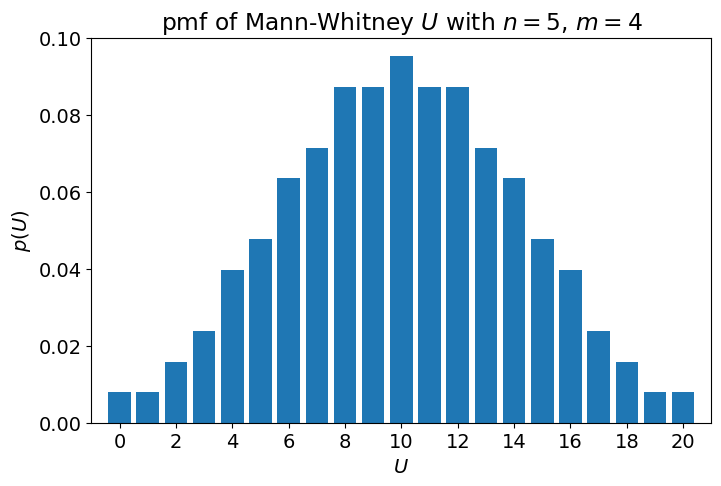

In [23]:
U_u = np.arange(n*m+1)
Upmf_u = mannwhitneypmf(U_u,n,m)
plt.bar(U_u,Upmf_u,align='center');
plt.xlabel(r'$U$');
plt.ylabel(r'$p(U)$');plt.title(r'pmf of Mann-Whitney $U$ with $n=%d$, $m=%d$' % (n,m));
plt.xlim(-1,n*m+1);plt.xticks(np.arange(0,n*m+1,2)); plt.grid();

## Normal Approximation

If $n$ & $m$ large, 
${\color{royalblue}{W_x}}$ (or ${\color{royalblue}{U_x}}$) is $\approx$ normally distributed.
- $E({\color{royalblue}{W_x}})=\frac{n(N+1)}{2}$ or $E({\color{royalblue}{U_x}}) = \frac{nm}{2}$ (also true if there are ties among the ranks)

- Variance is trickier; note that 
$${\color{royalblue}{W_x}} = \sum_{i=1}^n {\color{royalblue}{R_i}}$$ where
${\color{royalblue}{R_i}}$ is the rank (in the combined list) of
${\color{royalblue}{X_i}}$.  If there are no ties, $\{{\color{royalblue}{R_i}}\}$ is a sample of
size $n$ drawn **without replacement** from the integers $1,\ldots,N$.

- Turns out (see Conover 1.4)
$\operatorname{Var}({\color{royalblue}{R_i}})=\frac{(N+1)(N-1)}{12}$ and
$\operatorname{Cov}({\color{royalblue}{R_i}},{\color{royalblue}{R_{i'}}})=-\frac{(N+1)}{12}$
($i\ne i'$) so
$$
    \operatorname{Var}({\color{royalblue}{W_x}}) = n\operatorname{Var}({\color{royalblue}{R_i}}) + n(n-1)\operatorname{Cov}({\color{royalblue}{R_i}},{\color{royalblue}{R_{i'}}})=\frac{nm(N+1)}{12}$$

- $\color{royalblue}{W_x}$, $\color{royalblue}{W_y}$, $\color{royalblue}{U_x}$, and $\color{royalblue}{U_y}$ all have the same variance.

We can apply the normal approximation to the example at hand:

In [24]:
mu = n*(N+1)//2; sigma = np.sqrt(n*m*(N+1)/12.)
print("For n=%d, m=%d, E(W)=%g, V(W)=%g, sigma=%g"%(n,m,mu,sigma**2,sigma))

For n=5, m=4, E(W)=25, V(W)=16.6667, sigma=4.08248


In [25]:
z = (Wx - mu)/sigma
print("W=%g, z=%g, P(Z<z)=%g"%(Wx,z,stats.norm.cdf(z)))

W=19, z=-1.46969, P(Z<z)=0.0708223


Since the $p$-value is
$P({\color{royalblue}{W}}{\mathbin{\le}}19|H_0)=P({\color{royalblue}{W}}{\mathbin{\le}}19.5|H_0)$,
we could include a continuity correction:

In [26]:
stats.norm.cdf((Wx + 0.5 - mu)/sigma)

0.08895479749349122

We can compare this approximate $p$-value of $8.9\%$ to the exact value
of $9.5\%$ calculated above.

### Correcting for Ties

If any values are exactly equal, have to modify the procedure.  E.g.,

In [27]:
newx_i = np.array([8, 5, 48, 1, 1]); newy_j = np.array([15, 8, 28, 13])
newxy_r = np.concatenate([newx_i,newy_j]); newxy_r

array([ 8,  5, 48,  1,  1, 15,  8, 28, 13])

In [28]:
newranks_r = stats.rankdata(newxy_r); newranks_r

array([4.5, 3. , 9. , 1.5, 1.5, 7. , 4.5, 8. , 6. ])

In [29]:
newxranks_i = newranks_r[xflags_r]; newxranks_i

array([4.5, 3. , 9. , 1.5, 1.5])

In [30]:
newWx = np.sum(newxranks_i); newUx = np.sum(newx_i[None,:] > y_j[:,None]) + 0.5*np.sum(newx_i[None,:] == newy_j[:,None])
newWx, newUx, newUx + n*(n+1)//2

(19.5, 4.5, 19.5)

Have to use normal approx, but the variance is different because ranks not chosen from $1,2,\ldots,N$.

Even with ties, the sum of the ranks is $\sum_{r=1}^N R_r=N\left(\frac{N+1}{2}\right)$

In [31]:
np.sum(newranks_r), N*(N+1)//2

(45.0, 45)

The variance is reduced; lots of equivalent formulas, such as the following in Conover:
$$\operatorname{Var}({\color{royalblue}{W_x}})
=\frac{nm}{N(N-1)}\sum_{r=1}^N
  \left(
  R_r - \frac{N+1}{2}
  \right)^2
=\frac{nm}{N(N-1)}\sum_{r=1}^N {R_r}^2
-\frac{nm(N+1)^2}{4(N-1)}
$$
The former is more intuitive (rank minus average rank squared is the variance), but the latter is better computationally.

In [32]:
n*m/(N*(N-1))*np.sum((newranks_r-(N+1)/2)**2), n*m/(N*(N-1))*np.sum(newranks_r**2)-n*m*(N+1)**2/(4*(N-1))

(16.38888888888889, 16.388888888888886)

You can check that, when there are no ties and $\sum_{r=1}^N {R_r}^2$ is equal to $\frac{N(N+1)(2N+1)}{6}$, this reduces to the simpler no-tie formula.  E.g., for our original data:

In [33]:
n*m/(N*(N-1))*np.sum((ranks_r-(N+1)/2)**2), n*m/(N*(N-1))*np.sum(ranks_r**2)-n*m*(N+1)**2/(4*(N-1)), n*m*(N+1)/12.

(16.666666666666668, 16.66666666666667, 16.666666666666668)

There is an alternate formula which often appears:
$$\operatorname{Var}({\color{royalblue}{W_x}}) = \frac{nm}{12}
  \left(
    (N+1) - \sum_i \frac{\tau_i^3-\tau_i}{N(N-1)}
  \right)$$ where $\tau_i$ is the number of values included in the $i$th
tie.

In [34]:
np.sort(newranks_r)

array([1.5, 1.5, 3. , 4.5, 4.5, 6. , 7. , 8. , 9. ])

In [35]:
n*m/12. * (N+1 - (2**3-2)/(N*(N-1)) - (2**3-2)/(N*(N-1)))

16.38888888888889

This formula may simplify things on paper as opposed to on the computer

## Rank-Sum Intervals

As with the signed-rank statistic, we can use the rank-sum test to
produce a confidence interval for the offset between the distributions
or populations from which the $\{{\color{royalblue}{X_i}}\}$ and
$\{{\color{royalblue}{Y_j}}\}$ are drawn.

We can consider a rank-sum test of
the null hypothesis
$$H_0: P({\color{royalblue}{X}}-\theta{\mathbin{>}}{\color{royalblue}{Y}})=P({\color{royalblue}{X}}-\theta{\mathbin{<}}{\color{royalblue}{Y}})$$
and ask for what values of $\theta$ this would not be rejected at
significance $\alpha$, to get a $1-\alpha$ confidence interval

This is easiest to describe in terms of the Mann-Whitney $U$,
the number of $i$,$j$ pairs for which $$x_i-\theta > y_j$$

Following the
same argument we used in the signed-rank case, the statistic will change
every time $\theta=x_i-y_j$ for some $i$ and $j$, so the procedure says
to rank the $nm$ differences $x_i-y_j$ and set an interval using these
differences.

Using our example data, supposing we want a 90% confidence interval on
the location difference between the $x$ and $y$ populations. We start by
finding the 5th percentile of the Mann-Whitney $U$ distribution:

In [36]:
mannwhitneyppf(0.05,5,4)

3

In [37]:
print("P(U<=3)=%g and P(U<=2)=%g" % (mannwhitneycdf(3,5,4),mannwhitneycdf(2,5,4)))

P(U<=3)=0.0555556 and P(U<=2)=0.031746


So we see that
$$P(2{\mathbin{<}}{\color{royalblue}{U_x}}{\mathbin{<}}18) = 1-\frac{8}{126} \approx 93.7\%$$

We collect and sort the differences $x_i-y_j$, of which there are
$nm=20$, which also makes sense, since the Mann-Whitney statistic can be
between $0$ and $20$:

In [38]:
diff_ij = np.sort(x_i)[:,None]-np.sort(y_j)[None,:]; diff_ij

array([[-10.99, -12.59, -13.69, -26.69],
       [ -7.48,  -9.08, -10.18, -23.18],
       [ -7.27,  -8.87,  -9.97, -22.97],
       [ -3.74,  -5.34,  -6.44, -19.44],
       [ 35.8 ,  34.2 ,  33.1 ,  20.1 ]])

In [39]:
from matplotlib.cbook import flatten
sorteddiff_v = np.sort(list(flatten(diff_ij))); sorteddiff_v

array([-26.69, -23.18, -22.97, -19.44, -13.69, -12.59, -10.99, -10.18,
        -9.97,  -9.08,  -8.87,  -7.48,  -7.27,  -6.44,  -5.34,  -3.74,
        20.1 ,  33.1 ,  34.2 ,  35.8 ])

In [40]:
sorteddiff_v

array([-26.69, -23.18, -22.97, -19.44, -13.69, -12.59, -10.99, -10.18,
        -9.97,  -9.08,  -8.87,  -7.48,  -7.27,  -6.44,  -5.34,  -3.74,
        20.1 ,  33.1 ,  34.2 ,  35.8 ])

If $\theta<-26.69$, $u_{x-\theta}=0$; if $-26.69<\theta<-23.18$, $u_{x-\theta}=1$; if $-23.18<\theta<-22.97$, $u_{x-\theta}=2$.

If $35.8<\theta$, $u_{x-\theta}=20$; if $34.2<\theta<35.8$, $u_{x-\theta}=19$; if $33.1<\theta<-34.2$, $u_{x-\theta}=18$

So the range of $\theta$ values for which $2{\mathbin{<}}u_{x-\theta}{\mathbin{<}}18$ is:

In [41]:
(sorteddiff_v[2],sorteddiff_v[-2-1])

(-22.97, 33.1)

And this is our 90% (actually 93.7%) confidence interval.